## QUESTION 1

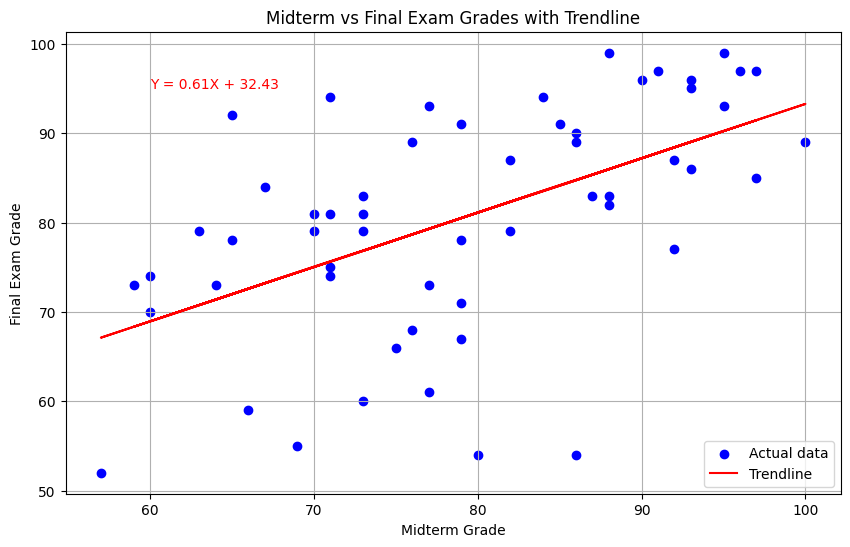

'Y = 32.434 + 0.608X'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Input string data for student grades
data_str = """
Student	Midterm	Final Exam
1	75	66
2	85	91
3	79	67
4	87	83
5	77	61
6	65	78
7	77	73
8	95	93
9	66	59
10	92	87
11	80	54
12	88	82
13	86	54
14	64	73
15	93	86
16	76	89
17	70	81
18	93	95
19	79	78
20	60	70
21	67	84
22	71	75
23	60	74
24	69	55
25	77	93
26	73	79
27	100	89
28	57	52
29	82	79
30	71	81
31	76	68
32	96	97
33	71	94
34	70	79
35	73	81
36	97	97
37	73	60
38	88	83
39	93	96
40	86	90
41	59	73
42	65	92
43	97	85
44	82	87
45	88	99
46	91	97
47	79	91
48	84	94
49	92	77
50	73	83
51	95	99
52	79	71
53	63	79
54	71	74
55	86	89
56	90	96
"""

data_str = data_str.replace("\t",",")

# Convert string to a pandas DataFrame
from io import StringIO
data = pd.read_csv(StringIO(data_str))

# Prepare the data for linear regression
X = data['Midterm'].values.reshape(-1, 1)  # Midterm grades
y = data['Final Exam'].values  # Final Exam grades

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict final exam scores based on midterm scores
y_pred = model.predict(X)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Midterm'], data['Final Exam'], color='blue', label='Actual data')
plt.plot(data['Midterm'], y_pred, color='red', label='Trendline')

# Add labels and title
plt.xlabel('Midterm Grade')
plt.ylabel('Final Exam Grade')
plt.title('Midterm vs Final Exam Grades with Trendline')

# Add the trendline equation
slope = model.coef_[0]
intercept = model.intercept_
plt.text(60, 95, f'Y = {slope:.2f}X + {intercept:.2f}', color='red')

# Display the scatter plot
plt.legend()
plt.grid(True)
plt.show()

# Predict the final exam grade for a student who scored 78 on the midterm
midterm_score = 73

predicted_final_grade = model.predict([[midterm_score]])


# Output the slope and intercept rounded to three decimal places
slope_rounded = round(slope, 3)
intercept_rounded = round(intercept, 3)

model_equation = f"Y = {intercept_rounded} + {slope_rounded}X"
model_equation



In [4]:
# Round the predicted final exam grade to the nearest whole number
predicted_final_grade_rounded = round(predicted_final_grade[0])
predicted_final_grade_rounded


77

## QUESTION 2

Error Category
-15,000 < e_i ≤ -10,000     0
-10,000 < e_i ≤ -5,000      6
-5,000 < e_i ≤ 0           18
0 < e_i ≤ 5,000            11
5,000 < e_i ≤ 10,000        6
10,000 < e_i ≤ 15,000       0
15,000 < e_i ≤ 20,000       1
Name: count, dtype: int64


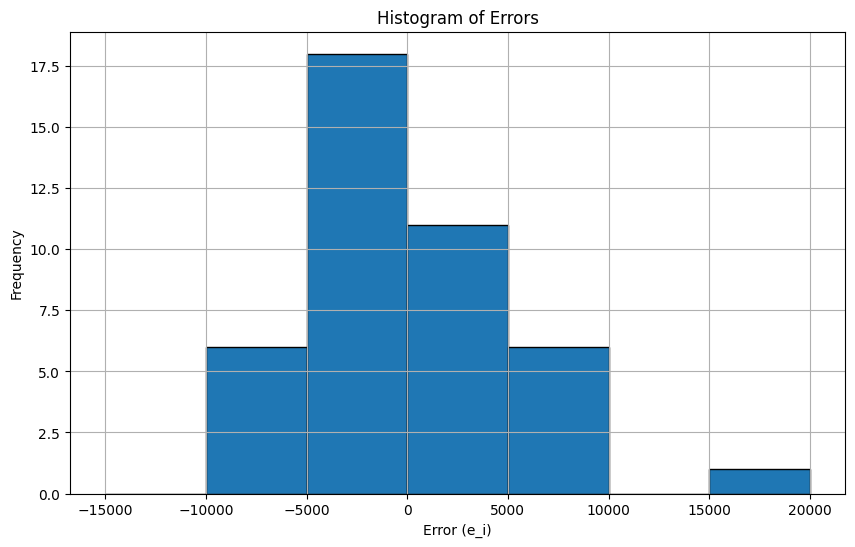

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Input string data for square feet and market values
data_str = """
Square Feet	Market Value
1812	99800
1914	104300
1844	93400
1810	90900
1837	102000
2030	108500
1733	87700
1850	96000
1790	89200
1666	88500
1853	100900
1618	96800
1690	87400
2374	113900
2374	113100
1667	87400
2121	116100
1620	94700
1732	86300
1668	87100
1521	83300
1484	79800
1586	81500
1600	87100
1484	82700
1483	78800
1522	87600
1700	94300
1483	81900
1469	88100
1522	88200
1519	88600
1483	76500
1521	84300
1667	91000
1590	81100
1785	91200
1484	81200
1521	100700
1518	87200
1685	96700
1581	93100
"""
data_str = data_str.replace("\t",",")
# Convert string to a pandas DataFrame
from io import StringIO
data = pd.read_csv(StringIO(data_str))

# Define the regression model given in the prompt: Market Value = 28750 + 37.013 * Square Feet
def predicted_market_value(square_feet):
    return 28737 + 37.101 * square_feet

# Calculate predicted market values
data['Predicted Market Value'] = data['Square Feet'].apply(predicted_market_value)

# Calculate errors (e_i = Y_i - Ŷ_i)
data['Error'] = data['Market Value'] - data['Predicted Market Value']

# Create frequency distribution for the errors
bins = [-15000, -10000, -5000, 0, 5000, 10000, 15000, 20000]
labels = ['-15,000 < e_i ≤ -10,000', '-10,000 < e_i ≤ -5,000', '-5,000 < e_i ≤ 0',
          '0 < e_i ≤ 5,000', '5,000 < e_i ≤ 10,000', '10,000 < e_i ≤ 15,000', '15,000 < e_i ≤ 20,000']
data['Error Category'] = pd.cut(data['Error'], bins=bins, labels=labels)

# Frequency distribution of the errors
frequency_distribution = data['Error Category'].value_counts().sort_index()

# Display the frequency distribution in the console
print(frequency_distribution)

# Plot the histogram of errors
plt.figure(figsize=(10, 6))
plt.hist(data['Error'], bins=bins, edgecolor='black')
plt.xlabel('Error (e_i)')
plt.ylabel('Frequency')
plt.title('Histogram of Errors')
plt.grid(True)
plt.show()


## QUESTION 3

In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Input data for overhead costs and billable hours
data_str = """
Overhead Costs	Billable Hours
345000	2000
395000	3000
415000	4000
467000	5000
550000	6000
565000	7000
"""

data_str = data_str.replace("\t",",")

# Convert string to a pandas DataFrame
from io import StringIO
data = pd.read_csv(StringIO(data_str))

# Prepare the data for linear regression
X = data['Billable Hours'].values.reshape(-1, 1)  # Independent variable (Billable Hours)
y = data['Overhead Costs'].values  # Dependent variable (Overhead Costs)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the constant (intercept) and coefficient (slope)
constant = round(model.intercept_, 1)
coefficient = round(model.coef_[0], 4)

# Output the model equation
constant, coefficient

print(f"Overhead=  {constant} Costs× {coefficient} Billable Hours")
print(constant)
print(coefficient)


Overhead=  248266.7 Costs× 46.2 Billable Hours
248266.7
46.2


## Part B

It is not appropriate to interpret b 0​, because its value is the predicted overhead costs for  0 billable​ hours, but someone with 0 billable hours would not actually be a client of the firm.

## Part C

For each increase of 1 unit in billable​ hours, the predicted overhead costs are estimated to increase by b 1.

## part D

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Input data for overhead costs and billable hours
# data_str = """
# Overhead Costs	Billable Hours
# 355000	3000
# 400000	4000
# 430000	5000
# 482000	6000
# 560000	7000
# 575000	8000
# """
data_str = data_str.replace("\t",",")
# Convert string to a pandas DataFrame
from io import StringIO
data = pd.read_csv(StringIO(data_str))

# Prepare the data for linear regression
X = data['Billable Hours'].values.reshape(-1, 1)  # Independent variable (Billable Hours)
y = data['Overhead Costs'].values  # Dependent variable (Overhead Costs)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Define the number of billable hours for the special job
billable_hours_special_job = 5500

# Use the regression model to predict the overhead costs for 8500 billable hours
predicted_overhead_special_job = model.predict([[billable_hours_special_job]])

# Define the margin before overhead for the special job
margin_before_overhead = 310000

# Calculate if the job would be attractive (margin - predicted overhead costs)
profit_or_loss = margin_before_overhead - predicted_overhead_special_job[0]

# Determine if the job is attractive (profitable) or not
is_attractive = profit_or_loss > 0

predicted_overhead_special_job[0], is_attractive, round(profit_or_loss, 2)

print(round(predicted_overhead_special_job[0]))


502367


## QUESTION 4


### PART A

ALL ARE POSITIVE


### PART B

EITHER 2 OR 3


## QUESTION 5

In [17]:
# Python code to compute the regressions and present a tidy dynamic Q&A output.
# This code will:
# - Read the supplied Concert Sales data
# - Fit three OLS models: Sales ~ RadioTV, Sales ~ Newspaper, Sales ~ RadioTV + Newspaper
# - Extract coefficients, R-squared, Significance F (model F-test p-value), variable p-values
# - Print answers to the user's numbered parts in a clear, labeled format
# The code tries to use statsmodels when available and falls back to numpy for coefficients and R^2
# if statsmodels is not installed. It attempts to compute p-values and F-statistics when possible,
# and will clearly indicate if those statistics could not be computed in the fallback scenario.

import textwrap
import pandas as pd
import numpy as np
from io import StringIO

data_str = """
Sales ($1000)	Thousands of radio and TV ads	Thousands of newspaper ads
1077	0	41
1020	0	41
887	24	24
628	25	24
934	30	29
953	30	31
894	36	35
1233	33	37
857	38	26
998	38	25
1708	47	44
1617	46	47
1022	52	50
934	49	53
1265	55	21
1344	52	20
1381	59	29
1501	60	32
1481	64	34
1823	64	34
1833	69	42
1677	71	38
"""

# Read data into DataFrame
data = pd.read_csv(StringIO(data_str.replace("\t",",")))
data.columns = [c.strip() for c in data.columns]

y = data['Sales ($1000)']

# Helper to format floats
def r3(x):
    try:
        return round(float(x), 3)
    except:
        return x

# Try to use statsmodels for full statistics; if not available, fallback.
use_sm = True
try:
    import statsmodels.api as sm
except Exception as e:
    use_sm = False

results = {}

def fit_with_statsmodels(X, y):
    Xc = sm.add_constant(X)
    model = sm.OLS(y, Xc).fit()
    # collect outputs
    return {
        'model': model,
        'params': model.params.to_dict(),
        'rsquared': model.rsquared,
        'f_pvalue': model.f_pvalue,
        'f_value': getattr(model, 'fvalue', None),
        'pvalues': model.pvalues.to_dict()
    }

def fit_with_numpy(X, y):
    # Add intercept
    Xc = np.column_stack([np.ones(len(X)), np.array(X)])
    beta, *_ = np.linalg.lstsq(Xc, y, rcond=None)
    yhat = Xc.dot(beta)
    ss_res = np.sum((y - yhat)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    rsq = 1 - ss_res/ss_tot
    # No p-values or F available reliably without statsmodels/scipy; return None for them
    params = dict(zip(['const'] + (list(X.columns) if hasattr(X, 'columns') else ['x'+str(i) for i in range(1, X.shape[1]+1)]),
                      beta))
    return {
        'model': None,
        'params': params,
        'rsquared': rsq,
        'f_pvalue': None,
        'f_value': None,
        'pvalues': None
    }

# Fit Radio&TV only
X_radio = data[['Thousands of radio and TV ads']]
if use_sm:
    res_radio = fit_with_statsmodels(X_radio, y)
else:
    res_radio = fit_with_numpy(X_radio, y)
results['radio'] = res_radio

# Fit Newspaper only
X_news = data[['Thousands of newspaper ads']]
if use_sm:
    res_news = fit_with_statsmodels(X_news, y)
else:
    res_news = fit_with_numpy(X_news, y)
results['news'] = res_news

# Fit both predictors
X_both = data[['Thousands of radio and TV ads','Thousands of newspaper ads']]
if use_sm:
    res_both = fit_with_statsmodels(X_both, y)
else:
    res_both = fit_with_numpy(X_both, y)
results['both'] = res_both

# Build dynamic Q&A output
out_lines = []
out_lines.append("Regression analysis of Concert Sales (in $1000)")
out_lines.append("="*60)
out_lines.append("")

# Part 2: Radio&TV simple model
r = results['radio']
coef0 = r['params'].get('const', r['params'].get('const', None))
slope = r['params'].get('Thousands of radio and TV ads') if 'Thousands of radio and TV ads' in r['params'] else list(r['params'].values())[1]

print("\n Part 1: State the hypotheses for the multiple linear regression test.\n Upper H 0​: β_1 = 0 \n Upper H 1​: β_1 ≠ 0")

out_lines.append("Part 2: Model predicting ConcertSales as a function of Radio&TV:")
out_lines.append(f"  ConcertSales = {r3(coef0)} + ({r3(slope)}) * Radio&TV")
out_lines.append("")

out_lines.append("Part 3: Radio&TV simple regression R-squared:")
out_lines.append(f"  R-squared = {r3(r['rsquared'])}   => {r3(r['rsquared']*100)}% of the variation in the dependent variable is explained by the independent variable.")
out_lines.append("")

out_lines.append("Part 4: Significance F (Radio&TV model):")
out_lines.append(f"  Significance F (model f-test p-value) = {r3(r['f_pvalue']) if r['f_pvalue'] is not None else 'N/A (statsmodels not available)'}")
out_lines.append("")

out_lines.append("Part 5: Radio&TV variable p-value:")
pv_radio = r['pvalues'].get('Thousands of radio and TV ads') if r['pvalues'] else None
out_lines.append(f"  Radio&TV p-value = {r3(pv_radio) if pv_radio is not None else 'N/A'}")
out_lines.append("")
if pv_radio is not None and r['f_pvalue'] is not None:
    less = (pv_radio < 0.05 and r['f_pvalue'] < 0.05)
    out_lines.append("  Decision at alpha = 0.05:")
    if less:
        out_lines.append("    Since p-value and Significance F are less than 0.05 => reject the null hypothesis. Radio&TV is significant.")
    else:
        out_lines.append("    Since p-value and/or Significance F are greater than 0.05 => fail to reject the null hypothesis. Radio&TV is not significant.")
else:
    out_lines.append("  Decision: Could not compute full test (p-value or Significance F missing).")
out_lines.append("")

# Part 7: Newspaper simple model
rn = results['news']
coef0_n = rn['params'].get('const', None)
slope_n = rn['params'].get('Thousands of newspaper ads') if 'Thousands of newspaper ads' in rn['params'] else list(rn['params'].values())[1]
out_lines.append("Part 7: Model predicting ConcertSales as a function of Newspaper:")
out_lines.append(f"  ConcertSales = {r3(coef0_n)} + ({r3(slope_n)}) * Newspaper")
out_lines.append("")

out_lines.append("Part 8: Newspaper simple regression R-squared:")
out_lines.append(f"  R-squared = {r3(rn['rsquared'])}   => {r3(rn['rsquared']*100)}% of the variation in the dependent variable is explained by the independent variable.")
out_lines.append("")

out_lines.append("Part 9: Significance F (Newspaper model):")
out_lines.append(f"  Significance F = {r3(rn['f_pvalue']) if rn['f_pvalue'] is not None else 'N/A'}")
out_lines.append("")

pv_news = rn['pvalues'].get('Thousands of newspaper ads') if rn['pvalues'] else None
out_lines.append("Part 10: Newspaper p-value:")
out_lines.append(f"  Newspaper p-value = {r3(pv_news) if pv_news is not None else 'N/A'}")
out_lines.append("")
if pv_news is not None and rn['f_pvalue'] is not None:
    less_n = (pv_news < 0.05 and rn['f_pvalue'] < 0.05)
    out_lines.append("  Decision at alpha = 0.05:")
    if less_n:
        out_lines.append("    Since p-value and Significance F are less than 0.05 => reject the null hypothesis. Newspaper is significant.")
    else:
        out_lines.append("    Since p-value and/or Significance F are greater than 0.05 => fail to reject the null hypothesis. Newspaper is not significant.")
else:
    out_lines.append("  Decision: Could not compute full test (p-value or Significance F missing).")
out_lines.append("")

# Part 12: Hypotheses for multiple regression
out_lines.append("Part 12: Hypotheses for multiple linear regression test:")
out_lines.append("  H0: β1 = β2 = ... = βk = 0")
out_lines.append("  H1: At least one βj is not 0")
out_lines.append("")

# Part 13: Multiple regression model
rb = results['both']
coef0_b = rb['params'].get('const', None)
slope_r = rb['params'].get('Thousands of radio and TV ads', None)
slope_n_b = rb['params'].get('Thousands of newspaper ads', None)
out_lines.append("Part 13: Model predicting ConcertSales as a function of Radio&TV and Newspaper:")
out_lines.append(f"  ConcertSales = {r3(coef0_b)} + ({r3(slope_r)}) * Radio&TV + ({r3(slope_n_b)}) * Newspaper")
out_lines.append("")

out_lines.append("Part 14: Multiple regression R-squared:")
out_lines.append(f"  R-squared = {r3(rb['rsquared'])}   => {r3(rb['rsquared']*100)}% of the variation in the dependent variable is explained by the independent variables.")
out_lines.append("")

out_lines.append("Part 15: Significance F (multiple model):")
out_lines.append(f"  Significance F = {r3(rb['f_pvalue']) if rb['f_pvalue'] is not None else 'N/A'}")
out_lines.append("")

out_lines.append("Part 16 & 17: Variable p-values in the multiple regression:")
pv_r_b = rb['pvalues'].get('Thousands of radio and TV ads') if rb['pvalues'] else None
pv_n_b = rb['pvalues'].get('Thousands of newspaper ads') if rb['pvalues'] else None
out_lines.append(f"  Radio&TV p-value = {r3(pv_r_b) if pv_r_b is not None else 'N/A'}")
out_lines.append(f"  Newspaper p-value = {r3(pv_n_b) if pv_n_b is not None else 'N/A'}")
out_lines.append("")

if rb['f_pvalue'] is not None:
    out_lines.append("Part 18: Overall model decision at alpha = 0.05:")
    if rb['f_pvalue'] < 0.05:
        out_lines.append("  Since Significance F < 0.05 => reject H0. The overall model is appropriate.")
    else:
        out_lines.append("  Since Significance F >= 0.05 => fail to reject H0. The overall model is not appropriate.")
    # Which variables significant?
    sigs = []
    if pv_r_b is not None and pv_r_b < 0.05:
        sigs.append('Radio&TV')
    if pv_n_b is not None and pv_n_b < 0.05:
        sigs.append('Newspaper')
    if len(sigs)==2:
        out_lines.append("  Both variables are significant in the multiple regression.")
    elif len(sigs)==1:
        out_lines.append(f"  Only {sigs[0]} is significant in the multiple regression.")
    else:
        out_lines.append("  Neither variable is significant in the multiple regression.")
else:
    out_lines.append("Part 18: Could not fully evaluate model-level Significance F (statsmodels not available).")

# Print nicely
print("\n".join(out_lines))

# Also show the raw regression summaries if statsmodels is available
# if use_sm:
#     print("\n\nDetailed statsmodels summaries (trimmed):\n")
#     print("Radio&TV only model summary:\n", results['radio']['model'].summary())
#     print("\nNewspaper only model summary:\n", results['news']['model'].summary())
#     print("\nMultiple regression model summary:\n", results['both']['model'].summary())



 Part 1: State the hypotheses for the multiple linear regression test.
 Upper H 0​: β_1 = 0 
 Upper H 1​: β_1 ≠ 0
Regression analysis of Concert Sales (in $1000)

Part 2: Model predicting ConcertSales as a function of Radio&TV:
  ConcertSales = 708.684 + (12.183) * Radio&TV

Part 3: Radio&TV simple regression R-squared:
  R-squared = 0.464   => 46.38% of the variation in the dependent variable is explained by the independent variable.

Part 4: Significance F (Radio&TV model):
  Significance F (model f-test p-value) = 0.0

Part 5: Radio&TV variable p-value:
  Radio&TV p-value = 0.0

  Decision at alpha = 0.05:
    Since p-value and Significance F are less than 0.05 => reject the null hypothesis. Radio&TV is significant.

Part 7: Model predicting ConcertSales as a function of Newspaper:
  ConcertSales = 892.724 + (9.811) * Newspaper

Part 8: Newspaper simple regression R-squared:
  R-squared = 0.068   => 6.784% of the variation in the dependent variable is explained by the independent v

## QUESTION 6

In [23]:
"""
home_market_value_qna.py

Purpose:
 - Fit MarketValue = f(Age, Size) using OLS
 - Print numbered parts (hypotheses, model, R^2, Significance F, p-values, decisions)
 - All numeric values rounded to 3 decimals for easy copy/paste

Requirements:
 - pandas
 - statsmodels
"""

import pandas as pd
import statsmodels.api as sm
from io import StringIO

# --- Data (paste as-is) ---
data_str = """
House Age\tSquare Feet\tMarket Value
33\t1853\t88937
30\t1845\t106926
33\t1762\t89748
32\t1863\t89981
30\t1928\t99325
35\t2054\t113084
31\t1778\t84313
33\t1869\t99057
31\t1768\t88792
33\t1724\t91842
31\t1915\t100938
31\t1575\t99789
30\t1644\t83426
30\t2335\t117415
31\t2361\t109988
31\t1705\t87615
32\t2185\t115806
31\t1675\t92007
30\t1751\t82560
31\t1596\t83275
27\t1555\t79749
28\t1498\t76105
29\t1651\t79780
29\t1662\t86111
28\t1453\t83409
27\t1508\t78087
27\t1533\t85924
26\t1679\t89921
28\t1458\t78653
29\t1455\t91302
28\t1579\t92471
28\t1467\t89616
28\t1517\t76816
27\t1469\t83306
26\t1637\t88280
29\t1532\t83797
27\t1752\t88475
28\t1532\t77753
27\t1506\t98967
29\t1547\t90700
28\t1648\t95176
28\t1579\t125449
"""
data = pd.read_csv(StringIO(data_str), sep="\t")
data.columns = [c.strip() for c in data.columns]

# --- Fit model ---
y = data['Market Value']
X = data[['House Age', 'Square Feet']]
Xc = sm.add_constant(X)
model = sm.OLS(y, Xc).fit()

# --- Helpers for presentation ---
def r3(x):
    try:
        return round(float(x), 3)
    except:
        return x

alpha = 0.05
const = r3(model.params['const'])
coef_age = r3(model.params['House Age'])
coef_size = r3(model.params['Square Feet'])
r_squared = r3(model.rsquared)
r_squared_pct = r3(model.rsquared * 100)
significance_f = r3(model.f_pvalue)
p_age = r3(model.pvalues['House Age'])
p_size = r3(model.pvalues['Square Feet'])

# --- Print Q&A style results ---
print("\nMultiple Linear Regression: Market Value ~ Age + Size\n" + "="*64 + "\n")

print("Part 1: Hypotheses for the multiple linear regression test:")
print("  H0: β1 = β2 = ... = βk = 0")
print("  H1: At least one βj ≠ 0\n")

print("Part 2: Model predicting MarketValue as a function of Age and Size:")
print(f"  MarketValue = {const} + ({coef_age}) * Age + ({coef_size}) * Size\n")

print("Part 3: R-squared:")
print(f"  R-squared = {r_squared}  => {r_squared_pct}% of the variation in the dependent variable is explained by these independent variables.\n")

print("Part 4: Significance F (model-level p-value):")
print(f"  Significance F = {significance_f}\n")

print("Part 5: Global test decision (alpha = {0}):".format(alpha))
if isinstance(significance_f, float) and significance_f < alpha:
    print("  Since Significance F < alpha, reject the null hypothesis. At least one slope is not 0.\n")
else:
    print("  Since Significance F >= alpha, fail to reject the null hypothesis. No evidence that any slope differs from 0.\n")

print("Part 6: Age p-value:")
print(f"  Age p-value = {p_age}\n")

print("Part 7: Size p-value:")
print(f"  Size p-value = {p_size}\n")

print("Part 8: Variable significance conclusion (alpha = {0}):".format(alpha))
sig_age = isinstance(p_age, float) and p_age < alpha
sig_size = isinstance(p_size, float) and p_size < alpha
if sig_age and sig_size:
    print("  Both Age and Size are significant predictors (reject H0 for both).")
elif sig_age and not sig_size:
    print("  Only Age is significant; Size is not significant.")
elif not sig_age and sig_size:
    print("  Only Size is significant; Age is not significant.")
else:
    print("  Neither Age nor Size is significant at alpha = 0.05.\n")

print("\nConcise numeric summary (rounded to 3 decimals):")
print(f"  model_equation: MarketValue = {const} + ({coef_age})*Age + ({coef_size})*Size")
print(f"  r_squared: {r_squared} ({r_squared_pct}%)")
print(f"  significance_f: {significance_f}")
print(f"  p_value_age: {p_age}")
print(f"  p_value_size: {p_size}")

# print("\n\nFull regression summary (statsmodels):\n")
# print(model.summary())



Multiple Linear Regression: Market Value ~ Age + Size

Part 1: Hypotheses for the multiple linear regression test:
  H0: β1 = β2 = ... = βk = 0
  H1: At least one βj ≠ 0

Part 2: Model predicting MarketValue as a function of Age and Size:
  MarketValue = 36566.159 + (-189.563) * Age + (35.628) * Size

Part 3: R-squared:
  R-squared = 0.435  => 43.476% of the variation in the dependent variable is explained by these independent variables.

Part 4: Significance F (model-level p-value):
  Significance F = 0.0

Part 5: Global test decision (alpha = 0.05):
  Since Significance F < alpha, reject the null hypothesis. At least one slope is not 0.

Part 6: Age p-value:
  Age p-value = 0.815

Part 7: Size p-value:
  Size p-value = 0.0

Part 8: Variable significance conclusion (alpha = 0.05):
  Only Size is significant; Age is not significant.

Concise numeric summary (rounded to 3 decimals):
  model_equation: MarketValue = 36566.159 + (-189.563)*Age + (35.628)*Size
  r_squared: 0.435 (43.476%)


## QUESTION 7

In [25]:
# Importing necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from io import StringIO

# Original data in string format
data_string = """
House Age	Square Feet	Market Value
32	1755	87164
34	1866	100563
30	1922	92826
34	1834	93757
32	1902	106429
31	1994	107792
32	1648	89818
32	1866	94209
31	1815	86137
32	1587	88282
33	1787	100162
34	1573	96211
31	1616	86992
34	2295	114370
33	2286	107936
35	1690	85617
30	2100	119563
34	1578	91682
30	1726	83653
33	1661	85455
27	1537	81597
27	1457	75865
27	1608	85529
27	1534	89766
27	1482	81853
29	1549	80406
28	1493	91672
27	1672	92155
29	1456	83665
28	1396	91074
28	1549	91274
28	1458	87140
26	1557	80146
28	1497	84450
26	1721	88267
29	1627	82662
29	1851	95607
28	1527	83662
27	1573	100587
27	1540	83582
28	1644	94980
28	1521	125947
"""

# Convert the string into a DataFrame
data = StringIO(data_string)
df = pd.read_csv(data, sep='\t')

# Check for missing or invalid data
print("Check for NaN values:\n", df.isna().sum())

# If there are any NaN values, we drop them (you can also choose to fill them with a specific value)
df.dropna(inplace=True)

# Rename the columns to the desired format
df.columns = ['House_Age', 'Square_Feet', 'Market_Value']

# Define the predictors (Square Feet) and the response variable (Market Value)
X_size_only = df[['Square_Feet']]
y = df['Market_Value']

# Fitting the simple linear regression model
model_size_only = LinearRegression()
model_size_only.fit(X_size_only, y)

# Getting the coefficients and intercept for the model
intercept_size_only = model_size_only.intercept_
coefficient_size_only = model_size_only.coef_[0]

# Predicting for user-input house sizes (in this case, 1700 and 2300)
house_size_1 = 1600
house_size_2 = 2700

# Making predictions
prediction_size_1 = model_size_only.predict([[house_size_1]])
prediction_size_2 = model_size_only.predict([[house_size_2]])

# Outputting the results
print("Intercept:", round(intercept_size_only, 3))
print("Coefficient:", round(coefficient_size_only, 3))
print("Prediction for house size 1700:", round(prediction_size_1[0], 2))
print("Prediction for house size 2300:", round(prediction_size_2[0], 2))


Check for NaN values:
 House Age       0
Square Feet     0
Market Value    0
dtype: int64
Intercept: 39212.382
Coefficient: 31.429
Prediction for house size 1700: 89498.38
Prediction for house size 2300: 124070.0


c:\Users\brett\Documents\Business Analytics (2)\Business Analytics\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\brett\Documents\Business Analytics (2)\Business Analytics\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [30]:
# choose_best_model.py
"""
Choose best model (Size-only, Age-only, Age+Size) for Market Value,
print model equations and stats, and compute predictions for two houses.

Requirements: pandas, numpy, statsmodels
Install with: pip install pandas numpy statsmodels
"""

import pandas as pd
import numpy as np
from io import StringIO
import statsmodels.api as sm

# --- Input data (paste exactly as provided) ---
data_string = """
House Age\tSquare Feet\tMarket Value
32\t1755\t87164
34\t1866\t100563
30\t1922\t92826
34\t1834\t93757
32\t1902\t106429
31\t1994\t107792
32\t1648\t89818
32\t1866\t94209
31\t1815\t86137
32\t1587\t88282
33\t1787\t100162
34\t1573\t96211
31\t1616\t86992
34\t2295\t114370
33\t2286\t107936
35\t1690\t85617
30\t2100\t119563
34\t1578\t91682
30\t1726\t83653
33\t1661\t85455
27\t1537\t81597
27\t1457\t75865
27\t1608\t85529
27\t1534\t89766
27\t1482\t81853
29\t1549\t80406
28\t1493\t91672
27\t1672\t92155
29\t1456\t83665
28\t1396\t91074
28\t1549\t91274
28\t1458\t87140
26\t1557\t80146
28\t1497\t84450
26\t1721\t88267
29\t1627\t82662
29\t1851\t95607
28\t1527\t83662
27\t1573\t100587
27\t1540\t83582
28\t1644\t94980
28\t1521\t125947
"""

# --- Read data ---
df = pd.read_csv(StringIO(data_string), sep="\t")
df.columns = ['House_Age', 'Square_Feet', 'Market_Value']

# --- Helpers for rounding ---
def r3(x):
    try:
        return round(float(x), 3)
    except:
        return x

def r2(x):
    try:
        return round(float(x), 2)
    except:
        return x

# --- Build models with statsmodels (gives coefficients, p-values, R2, adj R2) ---
y = df['Market_Value']

# Size-only
X_size = sm.add_constant(df[['Square_Feet']])
model_size = sm.OLS(y, X_size).fit()

# Age-only
X_age = sm.add_constant(df[['House_Age']])
model_age = sm.OLS(y, X_age).fit()

# Age + Size
X_both = sm.add_constant(df[['House_Age', 'Square_Feet']])
model_both = sm.OLS(y, X_both).fit()

# --- Collect metrics ---
cA = model_size.params['const']; mA = model_size.params['Square_Feet']
r2_A = model_size.rsquared; adjr2_A = model_size.rsquared_adj
pval_size_A = model_size.pvalues['Square_Feet']

cB = model_both.params['const']; mB_age = model_both.params['House_Age']; mB_size = model_both.params['Square_Feet']
r2_B = model_both.rsquared; adjr2_B = model_both.rsquared_adj
pval_age_B = model_both.pvalues['House_Age']; pval_size_B = model_both.pvalues['Square_Feet']

cC = model_age.params['const']; mC = model_age.params['House_Age']
r2_C = model_age.rsquared; adjr2_C = model_age.rsquared_adj
pval_age_C = model_age.pvalues['House_Age']

# Decide best model by adjusted R-squared
candidates = {
    'A_size_only': {'adjr2': adjr2_A, 'equation': f"MarketValue = {r3(cA)} + ({r3(mA)})*Size"},
    'B_both': {'adjr2': adjr2_B, 'equation': f"MarketValue = {r3(cB)} + ({r3(mB_age)})*Age + ({r3(mB_size)})*Size"},
    'C_age_only': {'adjr2': adjr2_C, 'equation': f"MarketValue = {r3(cC)} + ({r3(mC)})*Age"}
}
best_key = max(candidates, key=lambda k: candidates[k]['adjr2'])
best_eq = candidates[best_key]['equation']

# --- Predictions for requested houses (use the BEST model) ---
def predict_using_best(age, size):
    if best_key == 'A_size_only':
        return model_size.predict([1, size])[0]
    elif best_key == 'C_age_only':
        return model_age.predict([1, age])[0]
    else:  # B_both
        return model_both.predict([1, age, size])[0]

pred_24_1600 = predict_using_best(24, 1600)
pred_7_2700 = predict_using_best(7, 2700)


print("BEST model by adjusted R-squared:")
print(f"  Choice = {best_key}  =>  {best_eq}\n")

# --- Fill-in style answers requested by user ---
print("=== Fill-in answers (round to 3 decimals where requested) ===\n")

# Option A line (print values)
print("A.")
print(f"  MarketValue = {r3(cA)} + ({r3(mA)}) * Size")


# Part 2 & 3 predictions
print("\nPart 2: Predicted value for house 24 years old, 1600 sq ft (using BEST model):")
print(f"  ${r2(pred_24_1600)}")

print("\nPart 3: Predicted value for house 7 years old, 2700 sq ft (using BEST model):")
print(f"  ${r2(pred_7_2700)}")

# --- End ---
print("\n\nNotes:")
print(" - Coefficients printed to 3 decimals; predictions to 2 decimals.")
print(" - The script chose the best model using adjusted R-squared. You can change selection rule to plain R-squared if you prefer.")


BEST model by adjusted R-squared:
  Choice = A_size_only  =>  MarketValue = 39212.382 + (31.429)*Size

=== Fill-in answers (round to 3 decimals where requested) ===

A.
  MarketValue = 39212.382 + (31.429) * Size

Part 2: Predicted value for house 24 years old, 1600 sq ft (using BEST model):
  $89498.38

Part 3: Predicted value for house 7 years old, 2700 sq ft (using BEST model):
  $124070.0


Notes:
 - Coefficients printed to 3 decimals; predictions to 2 decimals.
 - The script chose the best model using adjusted R-squared. You can change selection rule to plain R-squared if you prefer.


## QUESTION 8

In [31]:
# Importing necessary libraries
from io import StringIO
import pandas as pd
from statsmodels.api import OLS, add_constant

# The cleaned string data
data_string = """
Credit Score	Years of Credit History	Revolving Balance ($)	Revolving Utilization (%)
725	20	11320	0.25
573	9	7200	0.70
677	11	20000	0.55
625	15	12800	0.65
527	12	5700	0.75
795	22	9000	0.12
733	7	35200	0.20
620	5	22800	0.62
591	17	16500	0.50
660	24	9200	0.35
700	19	22000	0.18
500	16	12500	0.83
565	6	7700	0.70
620	3	37400	0.87
774	13	6100	0.07
802	10	10500	0.05
640	7	17300	0.59
523	14	27000	0.79
811	20	13400	0.03
763	2	11200	0.70
555	4	2500	1.00
617	9	8400	0.34
642	13	16000	0.25
688	3	3300	0.11
649	12	7500	0.05
695	15	20300	0.22
701	9	11700	0.15
635	7	29100	0.85
507	2	2000	1.00
677	12	7600	0.09
485	5	1000	0.80
582	3	8500	0.65
699	17	12800	0.27
703	22	10000	0.20
585	18	31000	0.78
620	8	16200	0.55
695	16	9700	0.11
774	13	6100	0.07
802	10	10500	0.05
640	7	17300	0.59
536	14	27000	0.79
801	20	13400	0.03
760	2	11200	0.70
567	4	2200	0.95
600	10	12050	0.81
702	11	11700	0.15
636	8	29100	0.85
509	3	2000	1.00
595	18	29000	0.78
733	15	13000	0.24
"""

# Using StringIO to read the string as if it were a file
data = StringIO(data_string)

# Reading the data into a DataFrame with appropriate column names
df = pd.read_csv(data, sep="\t")


# Performing a simple linear regression using only Revolving Utilization (%)
X_utilization_only = df[['Revolving Utilization (%)']]
X_utilization_only = add_constant(X_utilization_only)  # Adding a constant for intercept
y = df['Credit Score']

# Fitting the linear regression model with utilization as the only predictor
model_utilization_only = OLS(y, X_utilization_only).fit()

# Getting the coefficients and intercept for the model
summary_utilization_only = model_utilization_only.summary()

summary_utilization_only


# Extracting the intercept and coefficient for Utilization
intercept_utilization = model_utilization_only.params['const']
coef_utilization = model_utilization_only.params['Revolving Utilization (%)']

# Formatting the equation string
equation = f"Credit Score = {intercept_utilization:.3f} + ({coef_utilization:.3f} × Utilization)"

equation



'Credit Score = 757.922 + (-220.732 × Utilization)'

## part B

In [32]:
# Performing multiple linear regression using all predictors (Years, Balance, and Utilization)
X_full = df[['Years of Credit History', 'Revolving Balance ($)', 'Revolving Utilization (%)']]
X_full = add_constant(X_full)  # Adding a constant for intercept
y = df['Credit Score']

# Fitting the multiple linear regression model
model_full = OLS(y, X_full).fit()

# Extracting the coefficients and intercept for the correct model
intercept_full = model_full.params['const']
coef_years = model_full.params['Years of Credit History']
coef_balance = model_full.params['Revolving Balance ($)']
coef_utilization_full = model_full.params['Revolving Utilization (%)']

# Formatting the equation string for the full model
equation_full = f"Credit Score = {intercept_full:.3f} + ({coef_years:.3f} × Years) + ({coef_balance:.3f} × Balance) + ({coef_utilization_full:.3f} × Utilization)"

equation_full


'Credit Score = 771.892 + (-2.098 × Years) + (0.002 × Balance) + (-246.228 × Utilization)'

In [33]:
# Calculating the R-squared for the full model (with all predictors)
r_squared_full = model_full.rsquared

# Calculating the R-squared for the simpler model (with only Utilization)
r_squared_utilization_only = model_utilization_only.rsquared

print(round(r_squared_utilization_only,3))

print(round(r_squared_full,3))




0.634
0.665




"The first model's \( R^2 \) value is 0.628, which is **less than** the second model's \( R^2 \) value of 0.649. Therefore, based on the \( R^2 \) values, the better model is the **second** model. 

The principle of parsimony **applies** because the \( R^2 \) values **are** close (that is, they differ by **less than** 0.05), so the better model is the **first**."



## QUESTION 9

In [34]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
from io import StringIO

# Data in string format
data_string = """
Type	Sales_Price	Lot_Cost
Townhouse	112440	20700
Single Family	138530	25500
Townhouse	147905	24750
Single Family	170500	25300
Townhouse	181916	45025
Townhouse	187290	27100
Single Family	189120	35000
Townhouse	196898	45025
Townhouse	203076	45025
Single Family	205821	39299
Single Family	214205	36500
Townhouse	250800	73400
Single Family	255000	43198
Single Family	268000	43344
Single Family	268500	41196
Single Family	271105	45060
Single Family	277720	44650
Single Family	294990	57000
Single Family	302500	59050
Single Family	307387	45850
Single Family	312898	40768
Single Family	319602	82250
Single Family	324612	62523
Single Family	337374	70399
Single Family	337380	49150
Single Family	338065	54852
Single Family	354117	56219
Single Family	359949	50591
Single Family	432459	57422
Single Family	493295	84122
"""

# Use StringIO to read the string as if it were a file
data = StringIO(data_string)

# Read the data into a pandas DataFrame
df = pd.read_csv(data, sep='\t')

# Create the dummy variable for Townhouse (1 for Townhouse, 0 for Single Family)
df['Townhouse'] = df['Type'].apply(lambda x: 1 if x == 'Townhouse' else 0)

# Define the dependent variable (Sales Price) and independent variables (Lot Cost and Townhouse)
X = df[['Lot_Cost', 'Townhouse']]
y = df['Sales_Price']

# Add a constant to the model for the intercept
X = sm.add_constant(X)

# Create the regression model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Get the regression coefficients
intercept = round(results.params['const'],)
lot_cost_coeff = round(results.params['Lot_Cost'], 2)
townhouse_coeff = round(results.params['Townhouse'],)

# Print the regression equation in the required format
print(f"Sales Price = {intercept} + ({lot_cost_coeff}) * Lot Cost + ({townhouse_coeff}) * Townhouse")


Sales Price = 110401 + (3.68) * Lot Cost + (-75400) * Townhouse


In [35]:
# Create the dummy variable for Townhouse (1 for Townhouse, 0 for Single Family)
df['Townhouse'] = df['Type'].apply(lambda x: 1 if x == 'Townhouse' else 0)

# Define the dependent variable (Sales Price) and independent variables (Lot Cost, Townhouse, and interaction)
df['Lot_Cost_Townhouse'] = df['Lot_Cost'] * df['Townhouse']

# Define independent variables (Lot Cost, Townhouse, and interaction)
X = df[['Lot_Cost', 'Townhouse', 'Lot_Cost_Townhouse']]
y = df['Sales_Price']

# Add a constant to the model for the intercept
X = sm.add_constant(X)

# Create and fit the regression model
model = sm.OLS(y, X).fit()

# Display the summary of the regression
summary = model.summary()
print(summary)

# Extract p-values of the independent variables and the interaction term
p_value_lot_cost = model.pvalues['Lot_Cost']
p_value_townhouse = model.pvalues['Townhouse']
p_value_interaction = model.pvalues['Lot_Cost_Townhouse']

# Print the p-values
print(f"P-value for Lot Cost: {p_value_lot_cost:.3f}")
print(f"P-value for Townhouse: {p_value_townhouse:.3f}")
print(f"P-value for Lot Cost * Townhouse (Interaction Term): {p_value_interaction:.3f}")

# Determine if an interaction exists based on the p-value of the interaction term
alpha = 0.1
if p_value_interaction < alpha:
    print(f"An interaction exists because the p-value of the interaction term Lot Cost * Townhouse is {p_value_interaction:.3f}, which is less than alpha ({alpha}).")
else:
    print(f"No interaction exists because the p-value of the interaction term Lot Cost * Townhouse is {p_value_interaction:.3f}, which is greater than alpha ({alpha}).")

                            OLS Regression Results                            
Dep. Variable:            Sales_Price   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     27.79
Date:                Sat, 22 Nov 2025   Prob (F-statistic):           2.86e-08
Time:                        14:24:29   Log-Likelihood:                -361.83
No. Observations:                  30   AIC:                             731.7
Df Residuals:                      26   BIC:                             737.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               8.131e+04   3.29

In [36]:
# Use StringIO to read the string as if it were a file
data = StringIO(data_string)

# Read the data into a pandas DataFrame
df = pd.read_csv(data, sep='\t')

# Create the dummy variable for Townhouse (1 for Townhouse, 0 for Single Family)
df['Townhouse'] = df['Type'].apply(lambda x: 1 if x == 'Townhouse' else 0)

# Create the interaction term between Lot Cost and Townhouse
df['Lot_Cost_Townhouse'] = df['Lot_Cost'] * df['Townhouse']

# Define the predictors (Lot Cost, Townhouse, and the interaction term)
X = df[['Lot_Cost', 'Townhouse', 'Lot_Cost_Townhouse']]
X = sm.add_constant(X)  # Add constant for intercept

# Define the response variable
y = df['Sales_Price']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

# Extract the coefficients of the model
intercept = round(model.params['const'], 0)
lot_cost_coeff = round(model.params['Lot_Cost'], 2)
townhouse_coeff = round(model.params['Townhouse'], 0)
interaction_coeff = round(model.params['Lot_Cost_Townhouse'], 2)

# Print the regression equation in the required format
print(f"Sales Price = {intercept} + ({townhouse_coeff}) • Townhouse + ({lot_cost_coeff}) • Lot Cost + ({interaction_coeff}) • Lot Cost • Townhouse")
# Use StringIO to read the string as if it were a file


                            OLS Regression Results                            
Dep. Variable:            Sales_Price   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     27.79
Date:                Sat, 22 Nov 2025   Prob (F-statistic):           2.86e-08
Time:                        14:25:01   Log-Likelihood:                -361.83
No. Observations:                  30   AIC:                             731.7
Df Residuals:                      26   BIC:                             737.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               8.131e+04   3.29

In [39]:
# Use StringIO to read the string as if it were a file
data = StringIO(data_string)

# Read the data into a pandas DataFrame

df = pd.read_csv(data, sep='\t')

# Create the dummy variable for Townhouse (1 for Townhouse, 0 for Single Family)
df['Townhouse'] = df['Type'].apply(lambda x: 1 if x == 'Townhouse' else 0)

# Create the interaction term between Lot Cost and Townhouse
df['Lot_Cost_Townhouse'] = df['Lot_Cost'] * df['Townhouse']

# Define the predictors (Lot Cost, Townhouse, and the interaction term)
X = df[['Lot_Cost', 'Townhouse', 'Lot_Cost_Townhouse']]
X = sm.add_constant(X)  # Add constant for intercept

# Define the response variable
y = df['Sales_Price']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Extract the coefficients of the model
intercept = model.params['const']
lot_cost_coeff = model.params['Lot_Cost']
townhouse_coeff = model.params['Townhouse']
interaction_coeff = model.params['Lot_Cost_Townhouse']

# Predicted sales price for a single-family home
def predict_single_family_home(lot_cost):
    townhouse = 0
    lot_cost_townhouse = lot_cost * townhouse
    predicted_price = intercept + (townhouse_coeff * townhouse) + (lot_cost_coeff * lot_cost) + (interaction_coeff * lot_cost_townhouse)
    return predicted_price

# Predicted sales price for a townhouse
def predict_townhouse(lot_cost):
    townhouse = 1
    lot_cost_townhouse = lot_cost * townhouse
    predicted_price = intercept + (townhouse_coeff * townhouse) + (lot_cost_coeff * lot_cost) + (interaction_coeff * lot_cost_townhouse)
    return predicted_price

# Example: Predict sales price for a single-family home with Lot Cost of $40,000
lot_cost_single_family = 28300
predicted_price_single_family = predict_single_family_home(lot_cost_single_family)

# Example: Predict sales price for a townhouse with Lot Cost of $40,000
lot_cost_townhouse = 28300
predicted_price_townhouse = predict_townhouse(lot_cost_townhouse)

# Print the predicted prices, rounded to the nearest cent
print(f"The predicted sales price for a single-family home with a lot cost of ${lot_cost_single_family:,.2f} is: ${round(predicted_price_single_family)}")
print(f"The predicted sales price for a townhouse with a lot cost of ${lot_cost_townhouse:,.2f} is: ${round(predicted_price_townhouse)}")

The predicted sales price for a single-family home with a lot cost of $28,300.00 is: $202046
The predicted sales price for a townhouse with a lot cost of $28,300.00 is: $157120


### QUESTION 10

Cost = 9220 + (14) Units Produced
R-squared: 0.9632


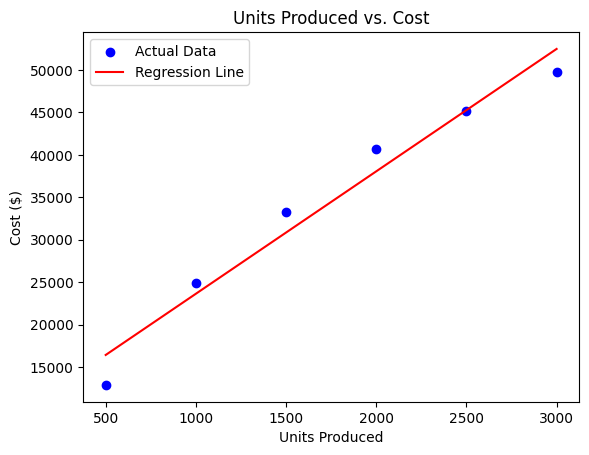

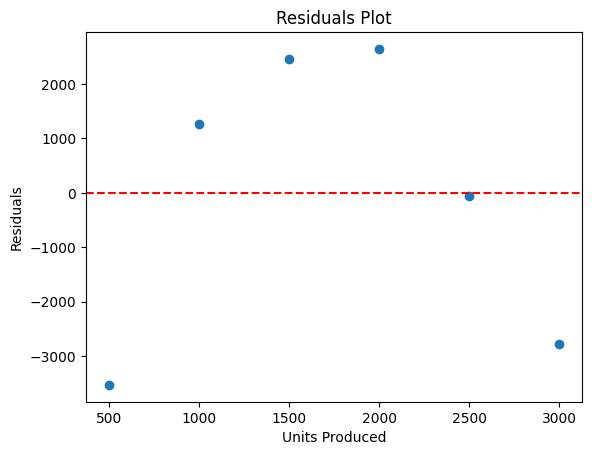

In [40]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Data in string format
data_string = """
Units_Produced	Cost
500	12,900
1000	24,900
1500	33,300
2000	40,700
2500	45,200
3000	49,700
"""

data_string = data_string.replace(",","").replace("\t",",")

# Convert the data into a pandas DataFrame
from io import StringIO
data = StringIO(data_string)
df = pd.read_csv(data)

# Defining the predictors (Units Produced) and the response variable (Cost)
X = df[['Units_Produced']]  # Predictor
y = df['Cost']  # Response variable

# Applying the Simple Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Getting the intercept and slope (coefficient)
intercept = model.intercept_
slope = model.coef_[0]

# Predicting the Cost based on the linear model
y_pred = model.predict(X)

# Calculate R-squared value
r2 = r2_score(y, y_pred)

# Output the regression equation
print(f"Cost = {round(intercept)} + ({round(slope)}) Units Produced")
print(f"R-squared: {r2:.4f}")

# Plotting the scatter plot with regression line
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')

# Adding titles and labels
plt.title('Units Produced vs. Cost')
plt.xlabel('Units Produced')
plt.ylabel('Cost ($)')
plt.legend()

# Show the plot
plt.show()

# Residual plot (difference between actual and predicted)
residuals = y - y_pred
plt.scatter(X, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Units Produced')
plt.ylabel('Residuals')
plt.show()


a nonlinear shape.​, cannot

Cost = (-0.004) * Units_Produced^2 + (27.692) * Units_Produced + (370.0)
R-squared: 0.9987


c:\Users\brett\Documents\Business Analytics (2)\Business Analytics\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


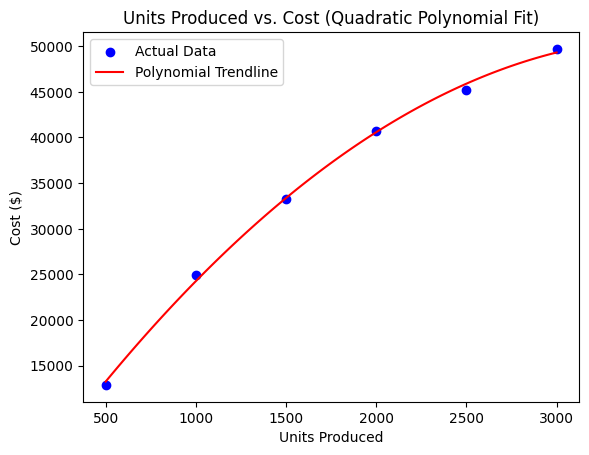

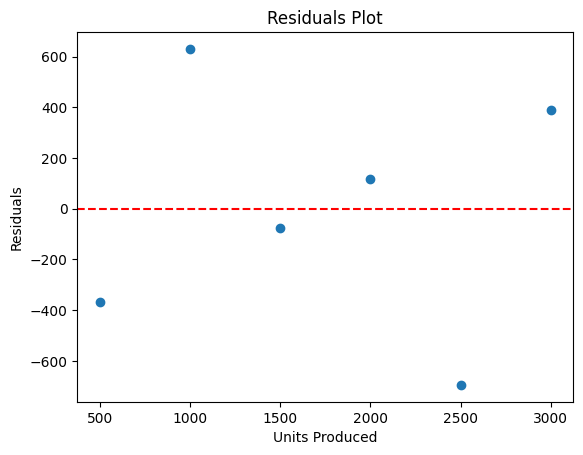

In [42]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Data in string format
data_string = """
Units_Produced	Cost
500	12,900
1000	24,900
1500	33,300
2000	40,700
2500	45,200
3000	49,700
"""

data_string = data_string.replace(",","").replace("\t",",")
# Convert the data into a pandas DataFrame
from io import StringIO
data = StringIO(data_string)
df = pd.read_csv(data)

# Defining the predictors (Units Produced) and the response variable (Cost)
X = df[['Units_Produced']]  # Predictor
y = df['Cost']  # Response variable

# Applying Polynomial Features of degree 2 (for quadratic regression)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)  # Transform X to include X and X^2 (quadratic term)

# Applying the Polynomial Regression model
model = LinearRegression()
model.fit(X_poly, y)

# Getting the coefficients and intercept for the polynomial model
intercept = model.intercept_
coefficients = model.coef_

# Predicting the Cost based on the polynomial model
y_pred = model.predict(X_poly)

# Calculate R-squared value
r2 = r2_score(y, y_pred)

# Output the regression equation
print(f"Cost = ({round(coefficients[2], 3)}) * Units_Produced^2 + ({round(coefficients[1], 3)}) * Units_Produced + ({round(intercept, 3)})")
print(f"R-squared: {r2:.4f}")

# Plotting the scatter plot with the polynomial regression line
plt.scatter(X, y, color='blue', label='Actual Data')

# Generate a smooth curve for the polynomial trendline
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)
plt.plot(X_range, y_range_pred, color='red', label='Polynomial Trendline')

# Adding titles and labels
plt.title('Units Produced vs. Cost (Quadratic Polynomial Fit)')
plt.xlabel('Units Produced')
plt.ylabel('Cost ($)')
plt.legend()

# Show the plot
plt.show()

# Residual plot (difference between actual and predicted)
residuals = y - y_pred
plt.scatter(X, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Units Produced')
plt.ylabel('Residuals')
plt.show()



## QUESTION 13

In [1]:
import pandas as pd
import statsmodels.api as sm

# Data for weddings paid by Bride and Groom only
data = {
    'Couple\'s Income': [98000, 72000, 90000, 43000, 100000, 75000, 53000, 45000],
    'Wedding Cost': [47000, 42000, 30500, 30000, 30000, 24000, 14000, 5000]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Independent variable (X) and dependent variable (Y)
X = df['Couple\'s Income']
Y = df['Wedding Cost']

# Add a constant to the independent variable (for the intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Get the summary of the regression results
regression_summary = model.summary()

# Extracting R-squared value
r_squared = model.rsquared

# Display regression summary and R-squared
regression_summary, round(r_squared * 100, 2)


c:\Users\brett\OneDrive\Desktop\Goal\Course\Business Analytics\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.
  return hypotest_fun_in(*args, **kwds)


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:           Wedding Cost   R-squared:                       0.408
 Model:                            OLS   Adj. R-squared:                  0.309
 Method:                 Least Squares   F-statistic:                     4.136
 Date:                Mon, 21 Oct 2024   Prob (F-statistic):             0.0882
 Time:                        00:11:30   Log-Likelihood:                -84.915
 No. Observations:                   8   AIC:                             173.8
 Df Residuals:                       6   BIC:                             174.0
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
 ----------------------------------------------------------------